# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

## Submitted By: Ninad Ghike

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'
validation_file = 'valid.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_validation, y_validation = valid['features'], valid['labels']

print('Done loading data')

Done loading data


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np
import csv

# TODO: Number of training examples
n_train = y_train.shape[0]

# TODO: Number of testing examples.
n_test = y_test.shape[0]

# TODO: Number of validation examples.
n_valid = len(X_validation)


# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]


print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_valid)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


# Load the signnames.csv file
with open('./signnames.csv') as csvfile:
    signnames = csv.reader(csvfile)
    # skip header
    next(signnames, None)

    for signname in signnames:
        print(signname)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43
['0', 'Speed limit (20km/h)']
['1', 'Speed limit (30km/h)']
['2', 'Speed limit (50km/h)']
['3', 'Speed limit (60km/h)']
['4', 'Speed limit (70km/h)']
['5', 'Speed limit (80km/h)']
['6', 'End of speed limit (80km/h)']
['7', 'Speed limit (100km/h)']
['8', 'Speed limit (120km/h)']
['9', 'No passing']
['10', 'No passing for vehicles over 3.5 metric tons']
['11', 'Right-of-way at the next intersection']
['12', 'Priority road']
['13', 'Yield']
['14', 'Stop']
['15', 'No vehicles']
['16', 'Vehicles over 3.5 metric tons prohibited']
['17', 'No entry']
['18', 'General caution']
['19', 'Dangerous curve to the left']
['20', 'Dangerous curve to the right']
['21', 'Double curve']
['22', 'Bumpy road']
['23', 'Slippery road']
['24', 'Road narrows on the right']
['25', 'Road work']
['26', 'Traffic signals']
['27', 'Pedestrians']
['28', 'Childr

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

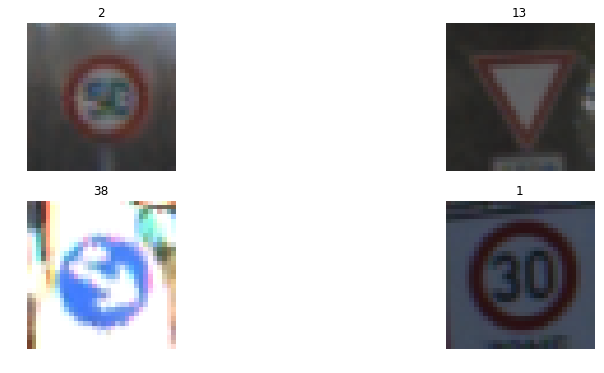

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

# show image of 10 random data points
fig, axs = plt.subplots(2,2, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(4):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])

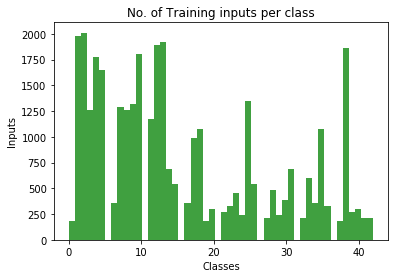

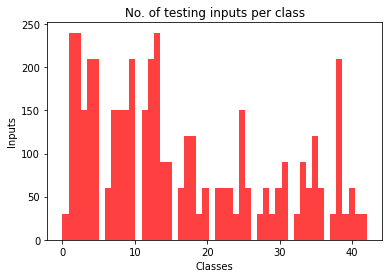

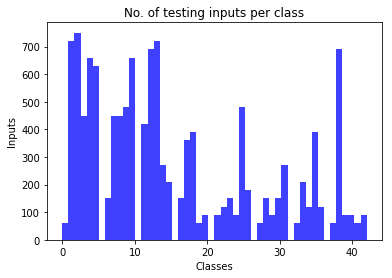

In [4]:
import scipy.ndimage

#set up the plot and show the training data as histogram
plt.figure(1)
n, bins, patches = plt.hist(y_train, 50, facecolor = 'green', alpha = 0.75)
plt.xlabel('Classes')
plt.ylabel('Inputs')
plt.title('No. of Training inputs per class')
plt.show()

#set up the plot and show the testing data as histogram
plt.figure(1)
n, bins, patches = plt.hist(y_validation, 50, facecolor = 'red', alpha = 0.75)
plt.xlabel('Classes')
plt.ylabel('Inputs')
plt.title('No. of testing inputs per class')
plt.show()

#set up the plot and show the testing data as histogram
plt.figure(1)
n, bins, patches = plt.hist(y_test, 50, facecolor = 'blue', alpha = 0.75)
plt.xlabel('Classes')
plt.ylabel('Inputs')
plt.title('No. of testing inputs per class')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Preprocessing
Done preprocessing


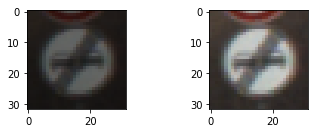

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
print('Preprocessing')
from sklearn.utils import shuffle
import cv2


# retain the original data(just in case)
X_train_orig = X_train
X_test_orig = X_test
X_valid_orig = X_validation


# Normalise input (images still in colour)
#X_train = (X_train - X_train.mean()) / (np.max(X_train) - np.min(X_train))
#X_test = (X_test - X_test.mean()) / (np.max(X_test) - np.min(X_test))
#X_validation = (X_validation - X_validation.mean()) / (np.max(X_validation) - np.min(X_validation))

def normalize_images(image):
    image = image/127.5-1.
    return image

X_train = normalize_images(X_train)
X_test = normalize_images(X_test)
X_validation = normalize_images(X_validation)

def plot_norm_image(image_index):
    """Plots original image on the left and normalised image on the right."""
    plt.subplot(2,2,1)
    plt.imshow(X_train_orig[image_index])
    plt.subplot(2,2,2)
    plt.imshow(X_train[image_index])
    
    
plot_norm_image(20)

def preprocess(image):
    img = np.copy(image)
    img[:,:,0] = cv2.equalizeHist(img[:,:,0])
    img[:,:,1] = cv2.equalizeHist(img[:,:,1])
    img[:,:,2] = cv2.equalizeHist(img[:,:,2])
    img = img/255.-.5
                
print('Done preprocessing')

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Initially I tried making the image less noisy. However, in some cases it worked really well, but in some cases the image was beyond identifiable. So I decided against the denoising. I applied a histogram equalization to make the image uniformly bright thereby avoiding too many hotspots or darkspots. This may also help the algorithm because there the image is evenly bright. I also scaled images between -.5 and .5, by dividing by 255. and subtracting .5. All these were done on shuffled dataset.**

In [6]:
### SETTING UP TENSOR FLOW
import tensorflow as tf



In [7]:
### Generate data additional data (OPTIONAL!)
print('Generating transformed data...')
### Rotate image, translate image, shear image

def transformation(image,ang_range,shear_range,trans_range):
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = image.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    image = cv2.warpAffine(image,Rot_M,(cols,rows))
    image = cv2.warpAffine(image,Trans_M,(cols,rows))
    image = cv2.warpAffine(image,shear_M,(cols,rows))
    
    #image = preprocess(image)
    #add_mode_data(image, label)
    return image

for i in range(n_classes):
        for j in range(len(y_train)):
            if (i == y_train[j]):
                #X_train[j] = transformation(X_train[j], 30, 5, 5)
                break

print('Done generating transformed data')

Generating transformed data...
Done generating transformed data


### Model Architechture


**Architecture:**

**Filter dimensions: 5X5.**

**Layer 1: Convolutional. The output shape is 28x28x6. With a RELU activation and Pooling with output shape of 14x14x6.**

**Layer 2: Convolutional. The output shape is 10x10x16. With a RELU activation and Pooling with output shape of 5x5x16.**

**Flattening: The output shape of the final pooling layer was flattened such that it is 1D instead of 3D. The output of this layer is 5*5*16 = 400.**

**Layer 3: Fully Connected. This layer has 120 outputs with a RELU activation.**

**Layer 4: Fully Connected. This layer has 84 outputs with a RELU activation.**

**Layer 5: Fully Connected (Logits). This is the final layer and has 43 outputs.**

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def LeNet(x):
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    print(logits.get_shape().as_list())
    
    return logits

In [9]:
###Setting up features and labels
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Define Training Pipeline




In [10]:
### Train your model here.
### Feel free to use as many code cells as needed.

### TRAINING PIPELINE
rate = 0.001
EPOCHS = 80
BATCH_SIZE = 128

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)



[None, 43]


In [11]:
###MODEL EVALUATION
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [12]:
### TRAIN THE MODEL
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.779

EPOCH 2 ...
Validation Accuracy = 0.870

EPOCH 3 ...
Validation Accuracy = 0.882

EPOCH 4 ...
Validation Accuracy = 0.908

EPOCH 5 ...
Validation Accuracy = 0.895

EPOCH 6 ...
Validation Accuracy = 0.913

EPOCH 7 ...
Validation Accuracy = 0.911

EPOCH 8 ...
Validation Accuracy = 0.910

EPOCH 9 ...
Validation Accuracy = 0.919

EPOCH 10 ...
Validation Accuracy = 0.916

EPOCH 11 ...
Validation Accuracy = 0.922

EPOCH 12 ...
Validation Accuracy = 0.917

EPOCH 13 ...
Validation Accuracy = 0.907

EPOCH 14 ...
Validation Accuracy = 0.910

EPOCH 15 ...
Validation Accuracy = 0.927

EPOCH 16 ...
Validation Accuracy = 0.919

EPOCH 17 ...
Validation Accuracy = 0.927

EPOCH 18 ...
Validation Accuracy = 0.926

EPOCH 19 ...
Validation Accuracy = 0.916

EPOCH 20 ...
Validation Accuracy = 0.918

EPOCH 21 ...
Validation Accuracy = 0.917

EPOCH 22 ...
Validation Accuracy = 0.923

EPOCH 23 ...
Validation Accuracy = 0.907

EPOCH 24 ...
Validation Accura

### Check Accuracy on provided Testing Dataset


In [13]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.925


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

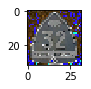

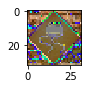

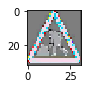

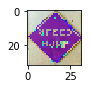

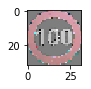

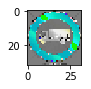

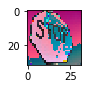

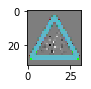

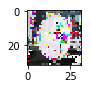

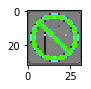

In [14]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
#images need to be size 32x32x3
#images also need to be scaled between -.5 and .5.
nb_of_images = 10
new_images = np.float32(np.zeros((nb_of_images,32,32,3)))
for i in range(1,nb_of_images+1):
    image = cv2.imread("./test_images/test{}.jpg".format(str(i)))
    image = cv2.resize(image,(32,32))
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = normalize_images(image)
    new_images[i-1] = image
    plt.figure(figsize = (1,1))
    plt.imshow(new_images[i-1]+.5)
    plt.show()

In [15]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
new_dict = tf.placeholder(tf.float32, (None, 32, 32, 3))


preds = tf.nn.softmax(LeNet(new_dict))

y_pred = np.zeros((nb_of_images, 1), dtype=np.int32)
y_prob = np.zeros((nb_of_images, 1))

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    saver.restore(sess, './lenet')
    print('model restored')
    
    values = sess.run(preds, feed_dict = {new_dict: new_images})
    top_k = sess.run(tf.nn.top_k(values, 5))
    print(top_k)

        
    print('Done predicting with downloaded test images')
    

[None, 43]
Instructions for updating:
Use `tf.global_variables_initializer` instead.
model restored
TopKV2(values=array([[ 0.04010111,  0.03778204,  0.03683318,  0.03623483,  0.03345862],
       [ 0.04848886,  0.04831151,  0.04826429,  0.04536189,  0.04359922],
       [ 0.03765466,  0.0365887 ,  0.03526487,  0.03340915,  0.03247045],
       [ 0.03402683,  0.03135793,  0.03062509,  0.02990548,  0.02983168],
       [ 0.04783731,  0.0355824 ,  0.03552499,  0.03495599,  0.03254493],
       [ 0.05016698,  0.04354544,  0.03804163,  0.03636627,  0.03449687],
       [ 0.04988698,  0.03954307,  0.03651185,  0.03447819,  0.03096073],
       [ 0.04075972,  0.04028893,  0.04013883,  0.03990793,  0.03934146],
       [ 0.03537794,  0.03235611,  0.03015875,  0.03012381,  0.02990496],
       [ 0.05271156,  0.04416053,  0.03726613,  0.03686526,  0.03289466]], dtype=float32), indices=array([[28, 37, 33, 10, 12],
       [31, 10, 12, 28, 16],
       [31, 28, 22,  3, 14],
       [10, 37, 14, 12, 40],
     

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.